# Cancer Drug Trial in Mice

## Overview

A small company specializes in drug-based, anti-cancer pharmaceuticals. Recently, they've  begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

We have complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. We will show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

Below, we will create plots to show:
* How the tumor volume changes over time for each treatment.
* How the number of metastatic (cancer spreading) sites changes over time for each treatment.
* The number of mice still alive through the course of treatment (survival rate).
* The total tumor volume change for each drug across the full 45 days of the trial.


In [1]:
# Dependencies.

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Establish current directory.

cd = os.path.abspath(".") 

# Read our data from csv files into two data frames.

clinicalDf = pd.read_csv(os.path.join(cd, 'clinicaltrial_data.csv'))
mouseDf = pd.read_csv(os.path.join(cd, 'mouse_drug_data.csv'))

In [3]:
clinicalDf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
len(clinicalDf)

1893

In [5]:
mouseDf.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
len(mouseDf)

250

In [7]:
combinedDf = pd.merge(clinicalDf, mouseDf, left_on = 'Mouse ID', right_on = 'Mouse ID', how = 'left')

In [8]:
combinedDf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [9]:
len(combinedDf)

1906

In [10]:
# We are only interested in four drugs, so we need to select only those mice treated with the right drugs and placebo.

drugs = combinedDf[combinedDf.Drug.isin( ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])]
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [11]:
len(drugs)

777

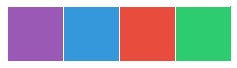

In [12]:
# Seaborn is used to customize the palete for all of the plots, so each series corresponding to one drug will
# have the same color throughout the analysis.

palete1 = ["#9b59b6", "#3498db", "#e74c3c", "#2ecc71"]
sns.set_palette(palete1)
sns.palplot(sns.color_palette())
plt.show()

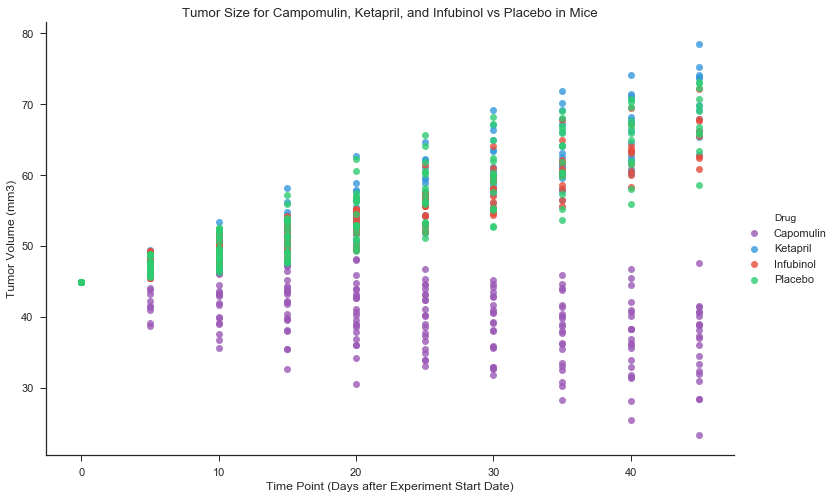

In [13]:
# Plot tumor volume over time for each of our drugs.

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

tumorWeight1 = sns.lmplot('Timepoint',
                         'Tumor Volume (mm3)',
                         data = drugs,
                         fit_reg = False,
                         hue = 'Drug',
                         scatter = True,
                         size = 7,
                         aspect = 1.5
                        )
plt.title('Tumor Size for Campomulin, Ketapril, and Infubinol vs Placebo in Mice')
plt.xlabel('Time Point (Days after Experiment Start Date)')

plt.show()
# plt.ylabel('Deaths')

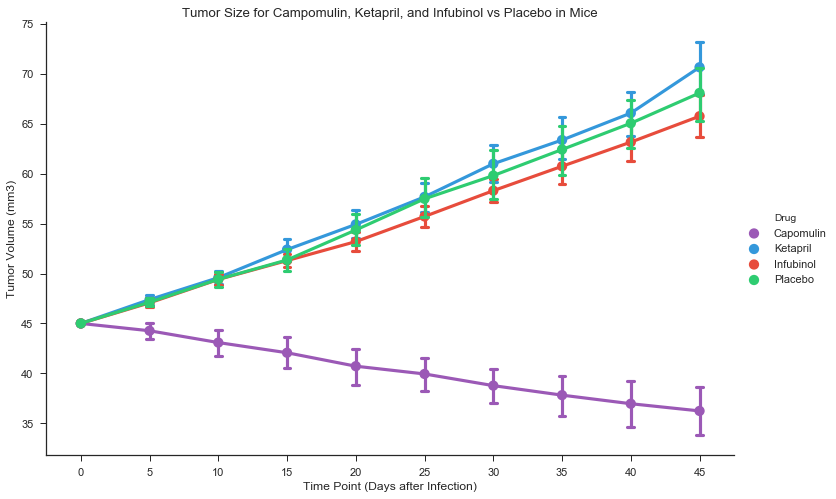

In [14]:
# The plot above works, but with a large number of observations over a small number of discreet time points
# it's difficult to see what is going on. We can use a factor plot and standard error to show the direction and
# distribution of the observations more clearly.

tumorWeight2 = sns.factorplot(x = "Timepoint",
    y = "Tumor Volume (mm3)",
    hue = "Drug",
    data = drugs,
    capsize = .1,
    size = 7,
    aspect = 1.5
    )
plt.title('Tumor Size for Campomulin, Ketapril, and Infubinol vs Placebo in Mice')
plt.xlabel('Time Point (Days after Infection)')
plt.show()

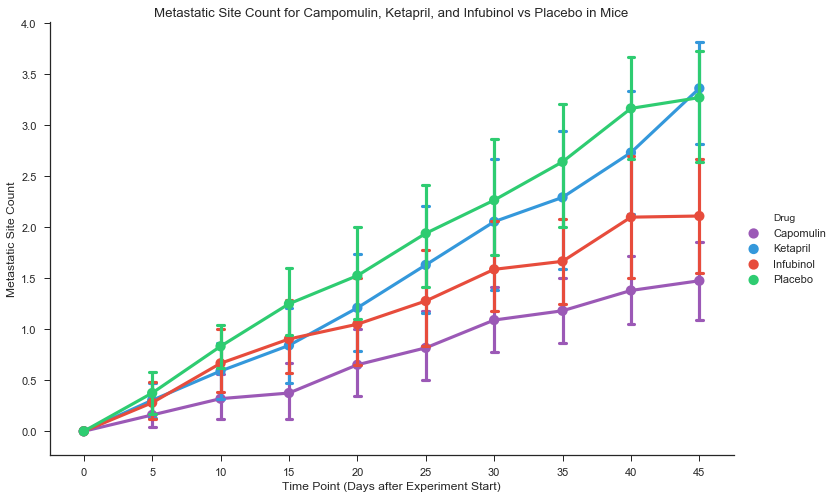

In [15]:
# Do the same for metastatic site count. 

MetaSites = sns.factorplot(x = "Timepoint",
    y = "Metastatic Sites",
    hue = "Drug",
    data = drugs,
    capsize = .1,
    size = 7,
    aspect = 1.5
    )
plt.title('Metastatic Site Count for Campomulin, Ketapril, and Infubinol vs Placebo in Mice')
plt.xlabel('Time Point (Days after Experiment Start)')
plt.ylabel('Metastatic Site Count')
plt.show()

In [16]:
# Next, to show survival rate, group the drugs DF by a count of mice at each time point.

survival = pd.DataFrame(drugs.groupby(['Timepoint','Drug']).agg({'Mouse ID' : ['count']})).reset_index()
list(survival)

[('Timepoint', ''), ('Drug', ''), ('Mouse ID', 'count')]

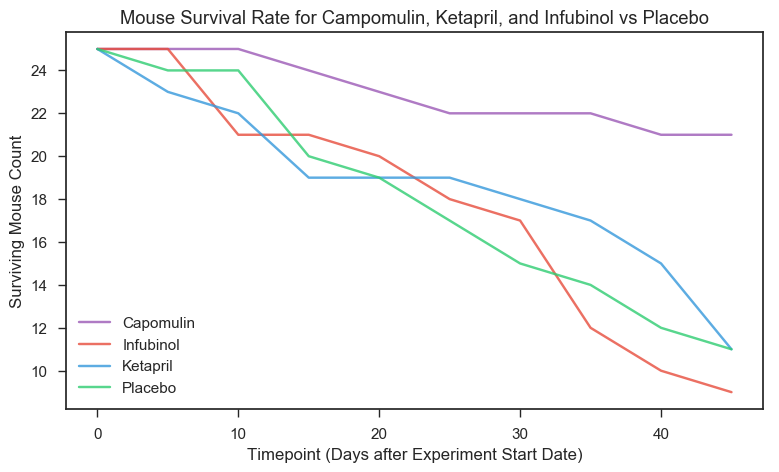

In [17]:
# Draw a line plot to show the survival rate over time.

palete1 = ["#9b59b6", "#e74c3c", "#3498db", "#2ecc71"]
sns.set_palette(palete1)

figa = plt.figure(figsize=(9, 5), dpi= 100)
ax1 = figa.add_subplot(1,1,1)

for i in  survival['Drug'].unique():
    series = survival[survival['Drug'] == i]
    ax1.plot(
    series.Timepoint, 
    series['Mouse ID'],
    label = i,
    alpha=.8,
            )
ax1.legend()
ax1.set_xlabel('Timepoint (Days after Experiment Start Date)')
ax1.set_ylabel('Surviving Mouse Count')
ax1.set_title('Mouse Survival Rate for Campomulin, Ketapril, and Infubinol vs Placebo')
plt.show()

In [18]:
# To get the overall change in tumor size by drug, group our original drug dataframe by timepoint and drug name
# aggregating the tumor volume with mean().

tumor = pd.DataFrame(drugs.groupby(['Timepoint','Drug']).agg({'Tumor Volume (mm3)' : ['mean']})).reset_index()

In [19]:
tumor.head()

,Timepoint,Drug,Tumor Volume (mm3)
,,,mean
0,0,Capomulin,45.000000
1,0,Infubinol,45.000000
2,0,Ketapril,45.000000
3,0,Placebo,45.000000
4,5,Capomulin,44.266086


In [20]:
# Using the tumor DF, a new DF can be created to show the percentage change between the highst timestamp for a drug
# and the lowest

tumorChanges = []
for drug in tumor['Drug'].unique():
    minimum = tumor[tumor['Drug'] == drug]['Timepoint'].idxmin()
    maximum = tumor[tumor['Drug'] == drug]['Timepoint'].idxmax()
    maxWeight = tumor.iloc[maximum]['Tumor Volume (mm3)'].values 
    minWeight = tumor.iloc[minimum]['Tumor Volume (mm3)'].values 
    tumorChanges.append([drug, round(float((maxWeight - minWeight)/minWeight*100), 2)])

In [21]:
tumorChange = pd.DataFrame(tumorChanges, columns=['Drug', 'Percent Change'])
tumorChange

,Drug,Percent Change
0,Capomulin,-19.48
1,Infubinol,46.12
2,Ketapril,57.03
3,Placebo,51.30


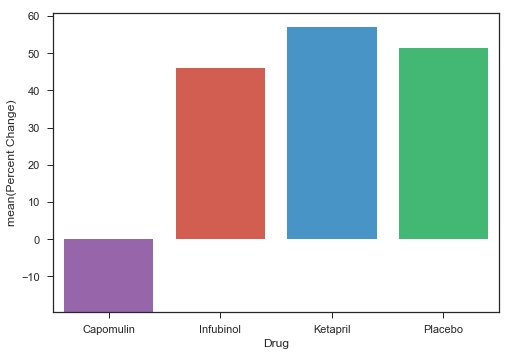

In [43]:
# Plot a bar graph showing the percent changes for each drug and placebo.

bar1 = sns.barplot('Drug', 'Percent Change', data=tumorChange)
plt.show()

## Some Conclusions

* Campomulin shows promise: mice treated with this drug show the fewest metastatic sites and it is the only drug that both reduces tumor size and improves survival rate.
* Infubinol is a mixed bag but may do more harm than good: mice treated with imfubinol have mean tumor weights below placebo and Ketapril and the second lowest mean metastatic site count, but a lower survival rate than placebo.